In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('Sugarcane_Production.csv')

In [18]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [19]:
df.shape

(103, 7)

# Data Cleaning

## Replace ',' and '.'

In [20]:
df['Production (Tons)']=df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [21]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


## Rename Column

In [22]:
df.rename(columns={'Production (Tons)':'Production(Tons)'},inplace=True)
df.rename(columns={'Production per Person (Kg)':'Production_per_Person(Kg)'},inplace=True)
df.rename(columns={'Acreage (Hectare)':'Acreage(Hectare)'},inplace=True)
df.rename(columns={'Yield (Kg / Hectare)':'Yield(Kg/Hectare)'},inplace=True)


In [23]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [24]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [25]:
df[df['Acreage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [26]:
df=df.dropna().reset_index()

In [27]:
df.isna().sum()

index                        0
Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64

## Remove column name having index and Unnamed:0

In [28]:
df.drop(['index','Unnamed: 0'],axis=1,inplace=True)

In [29]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


## Convert Datatypes

In [30]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [31]:
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)']=df['Production_per_Person(Kg)'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype(float)


In [32]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [33]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

# Univariate Analysis

In [34]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## How many countries produce sugarcane from each continent?

In [35]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

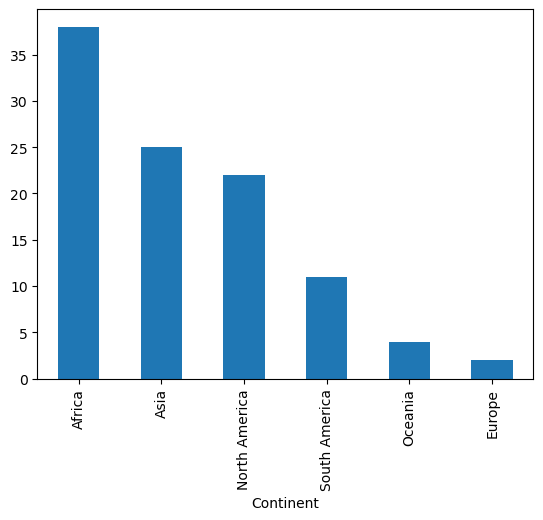

In [36]:
df['Continent'].value_counts().plot(kind='bar')

## Distribution of the columns

C:\Users\Prasad\AppData\Local\Temp\ipykernel_21584\68406639.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\Prasad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prasad\AppData\Local\Temp\ipykernel_21584\68406639.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar fl

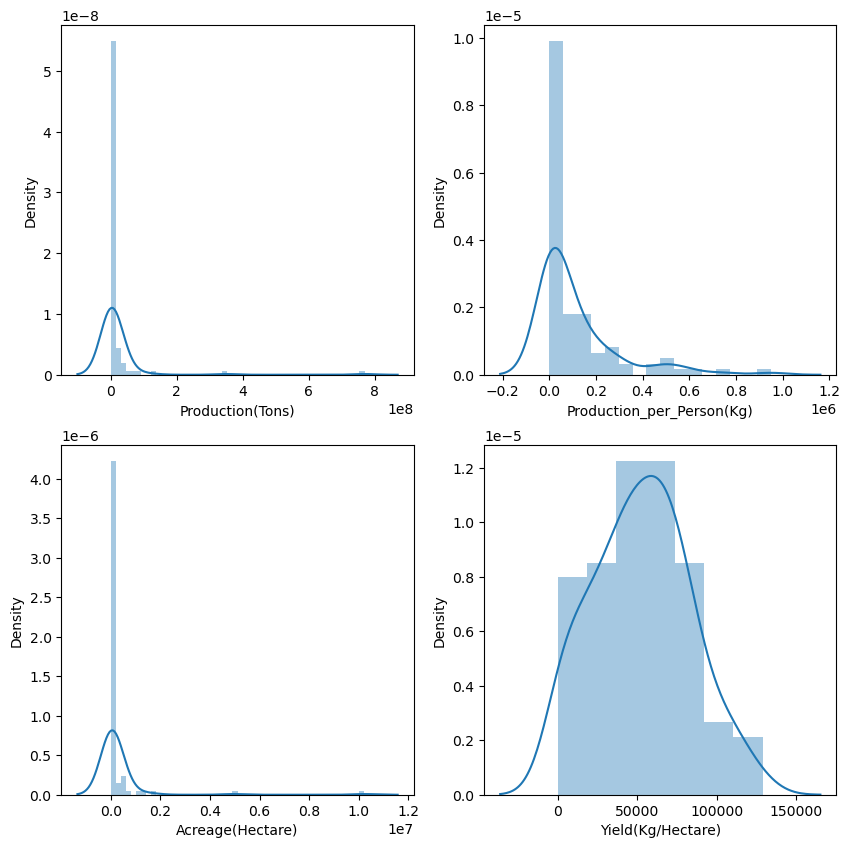

In [37]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])

plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person(Kg)'])

plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

plt.show()
           

## Checking outliers

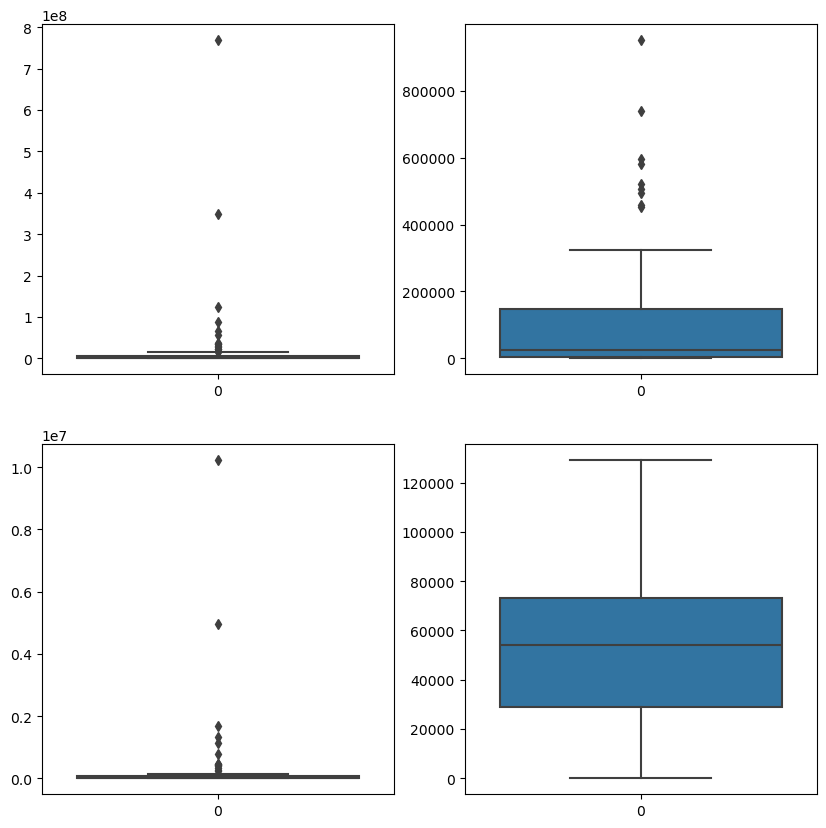

In [38]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])

plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])

plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

plt.show()

# Bivariate Analysis

In [39]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Which country produces maximum sugarcane

In [40]:
df_new=df[['Country','Production(Tons)']].set_index('Country')

In [41]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [42]:
df_new['Production(Tons)_percentage']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [43]:
df_new

,Production(Tons),Production(Tons)_percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


## Pie Chart for Production(Tons)_percentage

<Axes: ylabel='Production(Tons)_percentage'>

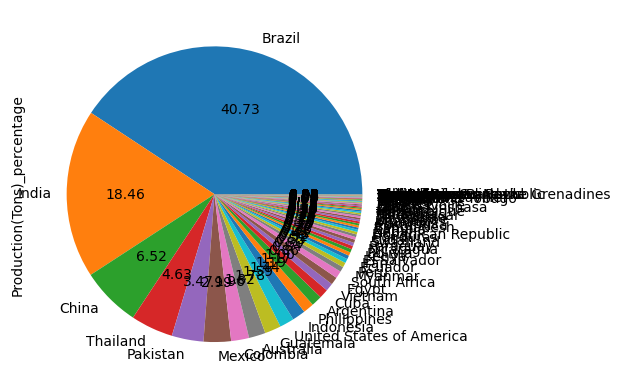

In [44]:
df_new['Production(Tons)_percentage'].plot(kind='pie',autopct='%.2f')

##  Bar Chart for Production(Tons)

<Axes: xlabel='Country'>

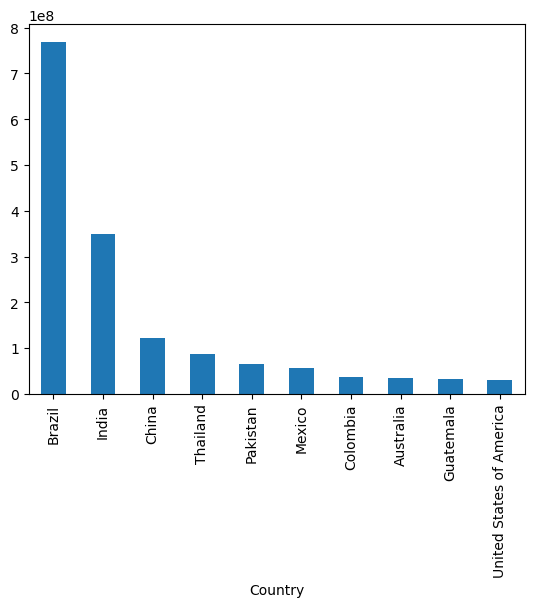

In [45]:
df_new['Production(Tons)'].head(10).plot(kind='bar')

## Plot Bar chart using seaborn library

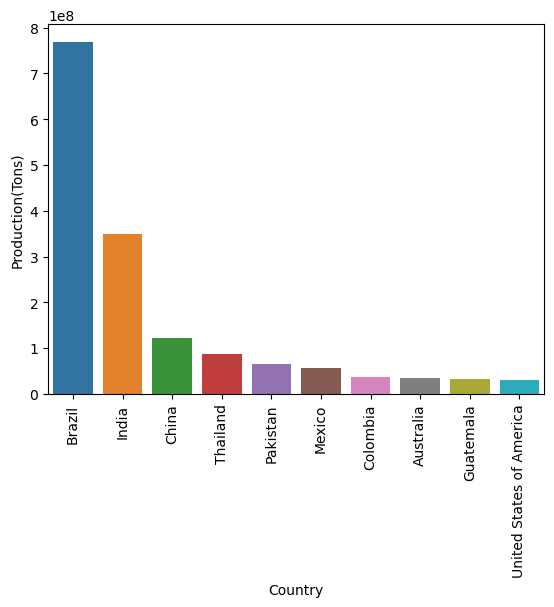

In [46]:
bar=sns.barplot(x='Country',y='Production(Tons)',data=df.head(10))
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

## Which country has highest land

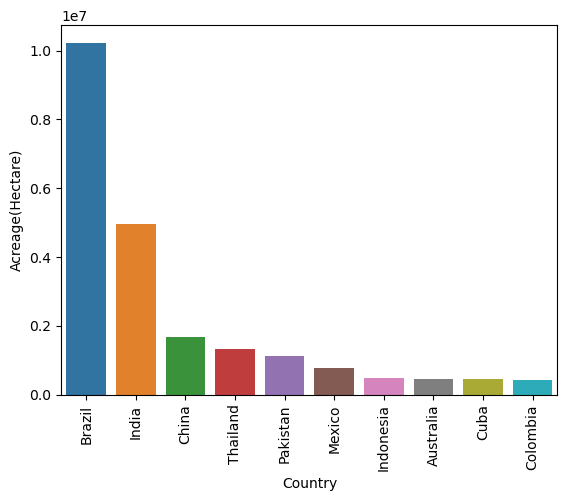

In [47]:
df_acr=df.sort_values('Acreage(Hectare)',ascending=False)
bar=sns.barplot(x='Country',y='Acreage(Hectare)',data=df_acr.head(10))
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

## Which country has highest Yield(Kg/Hectare)

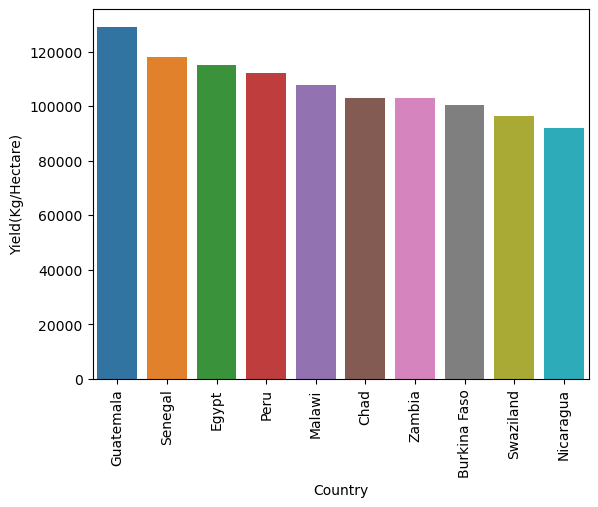

In [48]:
df_yield=df.sort_values('Yield(Kg/Hectare)',ascending=False)
bar=sns.barplot(x='Country',y='Yield(Kg/Hectare)',data=df_yield.head(10))
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

## Which country has highest production

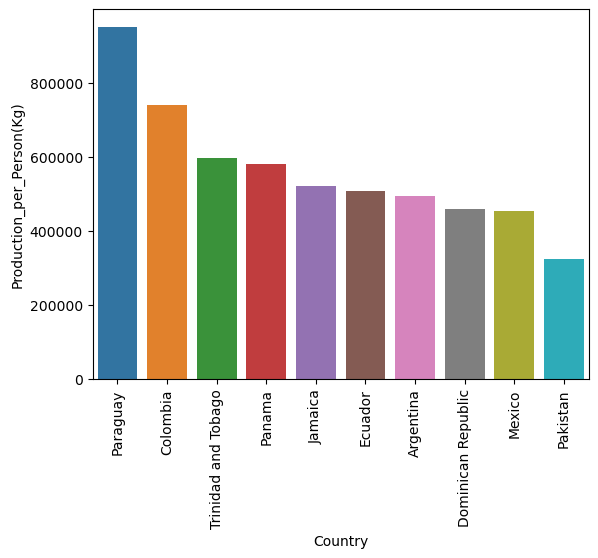

In [49]:
df_production=df.sort_values('Production_per_Person(Kg)',ascending=False)
bar=sns.barplot(x='Country',y='Production_per_Person(Kg)',data=df_production.head(10))
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.show()

## Correlation

In [50]:
df[['Production(Tons)','Production_per_Person(Kg)','Acreage(Hectare)','Yield(Kg/Hectare)']].corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

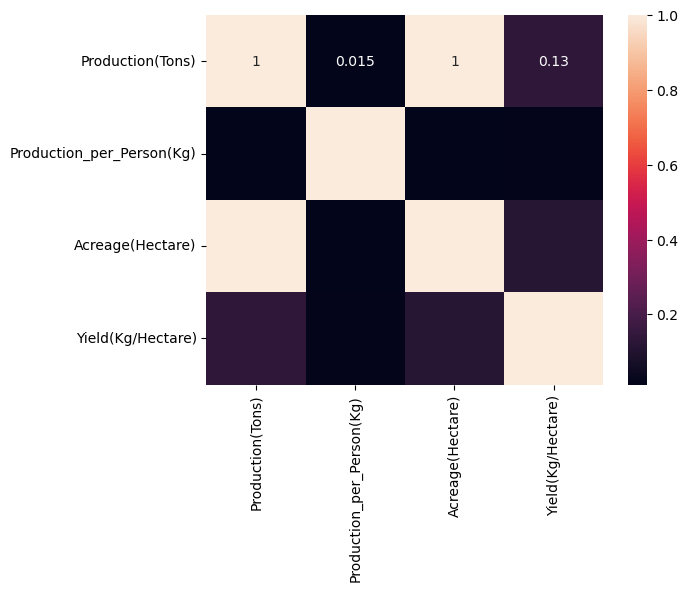

In [51]:
sns.heatmap(df[['Production(Tons)','Production_per_Person(Kg)','Acreage(Hectare)','Yield(Kg/Hectare)']].corr(),annot=True)

## Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

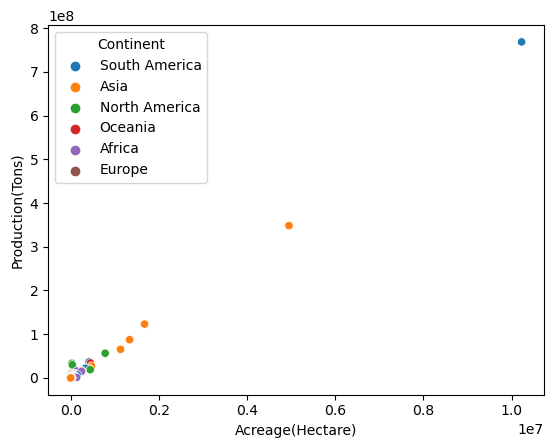

In [54]:
sns.scatterplot(x='Acreage(Hectare)',y='Production(Tons)',hue='Continent',data=df)

## Analysis for Continent

In [53]:
df_conti=df.groupby('Continent').sum()

In [75]:
df_conti['Number of country']=df.groupby('Continent').count()['Country']

In [76]:
df_conti

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Number of country
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


## Which continent produces maximum sugarcane?

In [79]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

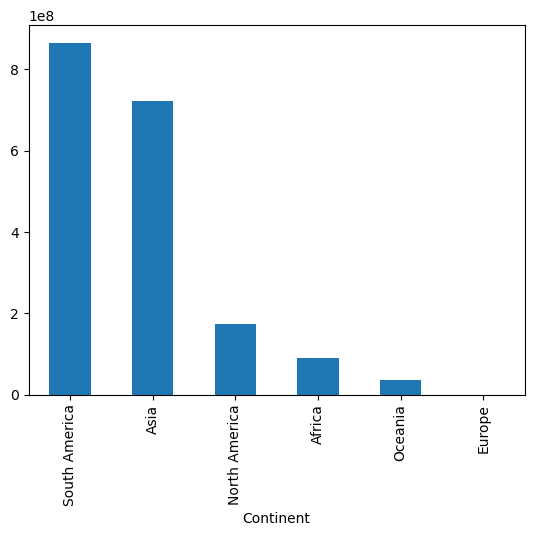

In [78]:
df_conti['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Continent'>

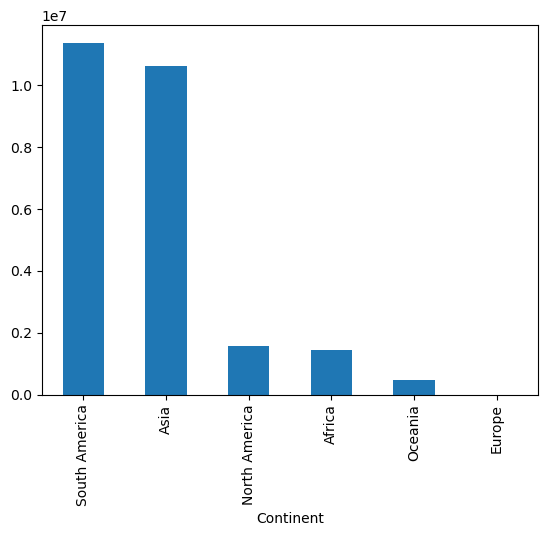

In [80]:
df_conti['Acreage(Hectare)'].sort_values(ascending=False).plot(kind='bar')

## Do number of countries in a Continent effects production of sugarcane?

In [82]:
continent_names=df_conti.index.to_list()

In [83]:
continent_names

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

C:\Users\Prasad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prasad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


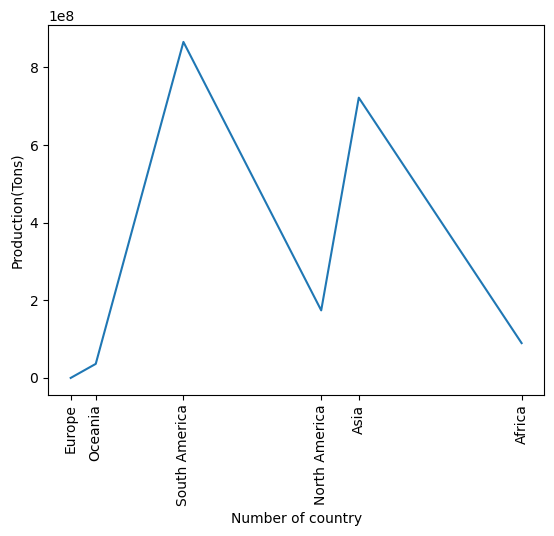

In [87]:
sns.lineplot(x='Number of country',y='Production(Tons)',data=df_conti)
plt.xticks(df_conti['Number of country'], continent_names, rotation =90)
plt.show()

## Do continent with highest land produces more sugarcane?

C:\Users\Prasad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prasad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

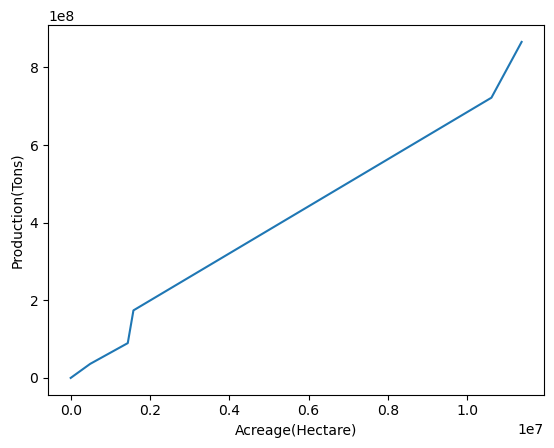

In [89]:
sns.lineplot(x='Acreage(Hectare)',y='Production(Tons)',data=df_conti)

## Production distribution by continent

Text(0.5, 1.0, 'Production Distribution by Continent')

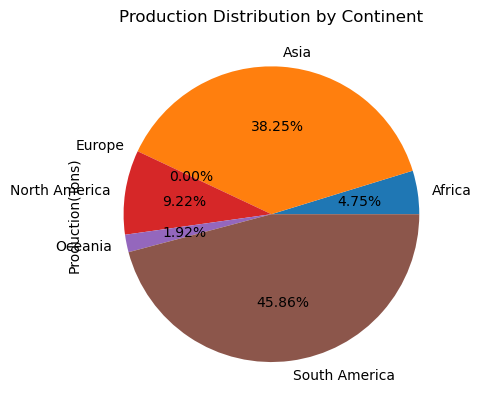

In [93]:
df_conti['Production(Tons)'].plot(kind='pie',autopct='%.2f%%')
plt.title('Production Distribution by Continent')

In [94]:
df_conti[['Production(Tons)','Production_per_Person(Kg)','Acreage(Hectare)','Yield(Kg/Hectare)','Number of country']].corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Number of country
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
Number of country,0.109244,0.540086,0.132817,0.989712,1.000000
